In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import mse

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [145]:
df=pd.read_csv("final_dataset_f.csv")

In [146]:
df

,DHSID,GEID,country code and phase,year of interview,URBAN_RURA,region,source of drinking water (simplified),time to get to water source (minutes),location of source for water,source of drinking water (weights)
0,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,5.0
1,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,5.0
2,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,5.0
3,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,5.0
4,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...
970631,ZW201500000400,ZWGE72FL,ZW7,2015.0,R,mashonaland east,protected well,0.0,in own yard/plot,3.0
970632,ZW201500000400,ZWGE72FL,ZW7,2015.0,R,mashonaland east,protected well,0.0,in own yard/plot,3.0
970633,ZW201500000400,ZWGE72FL,ZW7,2015.0,R,mashonaland east,unprotected well,10.0,elsewhere,2.0
970634,ZW201500000400,ZWGE72FL,ZW7,2015.0,R,mashonaland east,protected well,0.0,in own yard/plot,3.0


In [147]:
df.columns

Index(['DHSID', 'GEID', 'country code and phase', 'year of interview',
       'URBAN_RURA', 'region', 'source of drinking water (simplified)',
       'time to get to water source (minutes)', 'location of source for water',
       'source of drinking water (weights)'],
      dtype='object')

# Data Preprocessing (One_hot encoding, Standard Scaler)

In [148]:
df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean

,DHSID,GEID,country code and phase,year of interview,URBAN_RURA,region,source of drinking water (simplified),time to get to water source (minutes),location of source for water,source of drinking water (weights)
0,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,0.0,elsewhere,5.0
1,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,0.0,elsewhere,5.0
2,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,0.0,elsewhere,5.0
3,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,0.0,elsewhere,5.0
4,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,0.0,elsewhere,5.0
...,...,...,...,...,...,...,...,...,...,...
970631,ZW201500000400,ZWGE72FL,ZW7,2015.0,R,mashonaland east,protected well,0.0,in own yard/plot,3.0
970632,ZW201500000400,ZWGE72FL,ZW7,2015.0,R,mashonaland east,protected well,0.0,in own yard/plot,3.0
970633,ZW201500000400,ZWGE72FL,ZW7,2015.0,R,mashonaland east,unprotected well,10.0,elsewhere,2.0
970634,ZW201500000400,ZWGE72FL,ZW7,2015.0,R,mashonaland east,protected well,0.0,in own yard/plot,3.0


In [149]:
df1=df_clean.drop(['year of interview','URBAN_RURA','time to get to water source (minutes)','source of drinking water (weights)'], axis=1)

In [150]:
df1

,DHSID,GEID,country code and phase,region,source of drinking water (simplified),location of source for water
0,AO201100000001,AOGE61FL,AO5,mesoendemica estavel,piped into dwelling,elsewhere
1,AO201100000001,AOGE61FL,AO5,mesoendemica estavel,piped into dwelling,elsewhere
2,AO201100000001,AOGE61FL,AO5,mesoendemica estavel,piped into dwelling,elsewhere
3,AO201100000001,AOGE61FL,AO5,mesoendemica estavel,piped into dwelling,elsewhere
4,AO201100000001,AOGE61FL,AO5,mesoendemica estavel,piped into dwelling,elsewhere
...,...,...,...,...,...,...
970631,ZW201500000400,ZWGE72FL,ZW7,mashonaland east,protected well,in own yard/plot
970632,ZW201500000400,ZWGE72FL,ZW7,mashonaland east,protected well,in own yard/plot
970633,ZW201500000400,ZWGE72FL,ZW7,mashonaland east,unprotected well,elsewhere
970634,ZW201500000400,ZWGE72FL,ZW7,mashonaland east,protected well,in own yard/plot


In [151]:
#encoding Data into labels by Label encoder from sklearn
REVESE_LABELS=df1.columns
lb = LabelEncoder()
Temp = []
for i in df1.columns:
    Temp.extend(df1[i].unique())
lb.fit(Temp)
for i in df.columns:
    df1[i] = lb.transform(df1[i])

,DHSID,GEID,country code and phase,region,source of drinking water (simplified),location of source for water
0,0,0,0,230,3,0
1,0,0,0,230,3,0
2,0,0,0,230,3,0
3,0,0,0,230,3,0
4,0,0,0,230,3,0
...,...,...,...,...,...,...
970631,38713,86,60,219,7,2
970632,38713,86,60,219,7,2
970633,38713,86,60,219,14,0
970634,38713,86,60,219,7,2


In [152]:
df2 = pd.DataFrame(df_clean, columns=['year of interview','URBAN_RURA','time to get to water source (minutes)',
                                      'source of drinking water (weights)'])

In [153]:
df2= pd.get_dummies(df2, columns = ['URBAN_RURA'])

In [154]:
df2

,year of interview,time to get to water source (minutes),source of drinking water (weights),URBAN_RURA_R,URBAN_RURA_U
0,2011.0,0.0,5.0,0,1
1,2011.0,0.0,5.0,0,1
2,2011.0,0.0,5.0,0,1
3,2011.0,0.0,5.0,0,1
4,2011.0,0.0,5.0,0,1
...,...,...,...,...,...
970631,2015.0,0.0,3.0,1,0
970632,2015.0,0.0,3.0,1,0
970633,2015.0,10.0,2.0,1,0
970634,2015.0,0.0,3.0,1,0


In [155]:
col_names = ['year of interview','time to get to water source (minutes)','source of drinking water (weights)']
features = df2[col_names]


scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names )

In [156]:
df2

,year of interview,time to get to water source (minutes),source of drinking water (weights),URBAN_RURA_R,URBAN_RURA_U
0,2011.0,0.0,5.0,0,1
1,2011.0,0.0,5.0,0,1
2,2011.0,0.0,5.0,0,1
3,2011.0,0.0,5.0,0,1
4,2011.0,0.0,5.0,0,1
...,...,...,...,...,...
970631,2015.0,0.0,3.0,1,0
970632,2015.0,0.0,3.0,1,0
970633,2015.0,10.0,2.0,1,0
970634,2015.0,0.0,3.0,1,0


In [157]:
df2=df2.drop(['year of interview','time to get to water source (minutes)',
               'source of drinking water (weights)'], axis=1)

In [158]:
df2

,URBAN_RURA_R,URBAN_RURA_U
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
970631,1,0
970632,1,0
970633,1,0
970634,1,0


In [159]:
df2=pd.concat([scaled_features,df2], axis=1)

In [160]:
df2

,year of interview,time to get to water source (minutes),source of drinking water (weights),URBAN_RURA_R,URBAN_RURA_U
0,-0.943287,-0.516811,2.060657,0,1
1,-0.943287,-0.516811,2.060657,0,1
2,-0.943287,-0.516811,2.060657,0,1
3,-0.943287,-0.516811,2.060657,0,1
4,-0.943287,-0.516811,2.060657,0,1
...,...,...,...,...,...
970631,0.281455,-0.516811,0.274256,1,0
970632,0.281455,-0.516811,0.274256,1,0
970633,0.281455,-0.271779,-0.618945,1,0
970634,0.281455,-0.516811,0.274256,1,0


In [161]:
data=pd.concat([df1,df2], axis=1)

In [162]:
data

,DHSID,GEID,country code and phase,region,source of drinking water (simplified),location of source for water,year of interview,time to get to water source (minutes),source of drinking water (weights),URBAN_RURA_R,URBAN_RURA_U
0,0,0,0,230,3,0,-0.943287,-0.516811,2.060657,0,1
1,0,0,0,230,3,0,-0.943287,-0.516811,2.060657,0,1
2,0,0,0,230,3,0,-0.943287,-0.516811,2.060657,0,1
3,0,0,0,230,3,0,-0.943287,-0.516811,2.060657,0,1
4,0,0,0,230,3,0,-0.943287,-0.516811,2.060657,0,1
...,...,...,...,...,...,...,...,...,...,...,...
970631,38713,86,60,219,7,2,0.281455,-0.516811,0.274256,1,0
970632,38713,86,60,219,7,2,0.281455,-0.516811,0.274256,1,0
970633,38713,86,60,219,14,0,0.281455,-0.271779,-0.618945,1,0
970634,38713,86,60,219,7,2,0.281455,-0.516811,0.274256,1,0


# Auto Encoder

In [163]:
train_data, test_data = train_test_split(data, test_size=0.2)

inputs = keras.Input(shape=(data.shape[1],))
encoded = layers.Dense(64, activation='relu')(inputs)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(data.shape[1], activation='sigmoid')(decoded)
autoencoder = keras.Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [164]:
history = autoencoder.fit(train_data, train_data,
                epochs=8,
                batch_size=32,
                validation_data=(test_data, test_data))

Epoch 1/8
24266/24266 [==============================] - 51s 2ms/step - loss: 43962956.0000 - val_loss: 43892388.0000
Epoch 2/8
24266/24266 [==============================] - 49s 2ms/step - loss: 43962892.0000 - val_loss: 43892388.0000
Epoch 3/8
24266/24266 [==============================] - 48s 2ms/step - loss: 43962864.0000 - val_loss: 43892388.0000
Epoch 4/8
24266/24266 [==============================] - 49s 2ms/step - loss: 43962796.0000 - val_loss: 43892388.0000
Epoch 5/8
24266/24266 [==============================] - 47s 2ms/step - loss: 43962940.0000 - val_loss: 43892388.0000
Epoch 6/8
24266/24266 [==============================] - 47s 2ms/step - loss: 43962988.0000 - val_loss: 43892388.0000
Epoch 7/8
24266/24266 [==============================] - 47s 2ms/step - loss: 43963012.0000 - val_loss: 43892388.0000
Epoch 8/8
24266/24266 [==============================] - 47s 2ms/step - loss: 43962924.0000 - val_loss: 43892388.0000


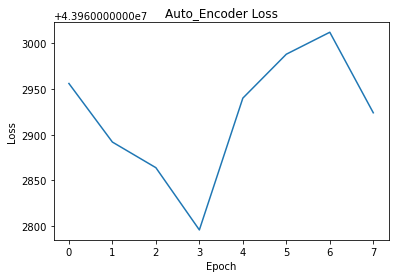

In [165]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Auto_Encoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# REGPLOT of AutoEncoder

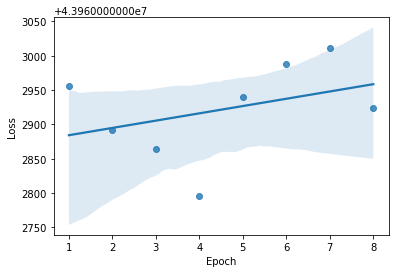

In [166]:
loss2=history.history['loss']

l1=[]
epoc1 = len( history.history['loss'])
for i in range(epoc1):
        l1.append(i+1)
# Create a sample DataFrame with epoch and loss values
df = pd.DataFrame({
    'epoch': l1,
    'loss' : loss2
})

# Create a scatter plot with a linear regression line
sns.regplot(x='epoch', y='loss', data=df)

# Set the x and y axis labels
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Show the plot
plt.show()


# Variational AutoEncoder

In [167]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the encoder network
def make_encoder_model(input_shape, latent_dim):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(latent_dim, activation='relu'),
    ])
    return model

In [168]:
# Define the decoder network
def make_decoder_model(latent_dim, output_shape):
    model = keras.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(output_shape, activation='linear'),
    ])
    return model

In [169]:
def make_vae_model(input_shape, latent_dim):
    
    encoder = make_encoder_model(input_shape, latent_dim)
    decoder = make_decoder_model(latent_dim, input_shape)
    
    inputs = layers.Input(shape=input_shape)
    
    z = encoder(inputs)
    reconstruction = decoder(z)
    
    vae = keras.Model(inputs, reconstruction)
    
    reconstruction_loss = tf.keras.losses.MeanSquaredError()
    
    kl_loss = -0.5 * tf.reduce_mean(1 + tf.math.log(tf.square(tf.math.reduce_std(z))) - tf.square(tf.math.reduce_mean(z)) - tf.square(tf.math.reduce_std(z)))
    
    # Total loss adding both........
    vae_loss = reconstruction_loss(inputs, reconstruction) + kl_loss
    
    vae.add_loss(vae_loss)
    
    return vae

In [177]:
x_train = data.drop(['time to get to water source (minutes)'] , axis=1)
y_train = data['time to get to water source (minutes)']

input_shape = 10
output_shape =1
latent_dim = 10

vae = make_vae_model(input_shape, latent_dim)

vae.compile(optimizer='adam')

result=vae.fit(x_train, y_train, epochs=8, batch_size=32)


Epoch 1/8
30333/30333 [==============================] - 58s 2ms/step - loss: 87918.0625
Epoch 2/8
30333/30333 [==============================] - 56s 2ms/step - loss: 6474.2217
Epoch 3/8
30333/30333 [==============================] - 59s 2ms/step - loss: 1436.1663
Epoch 4/8
30333/30333 [==============================] - 54s 2ms/step - loss: 829.3657
Epoch 5/8
30333/30333 [==============================] - 57s 2ms/step - loss: 492.1101
Epoch 6/8
30333/30333 [==============================] - 59s 2ms/step - loss: 498.8107
Epoch 7/8
30333/30333 [==============================] - 58s 2ms/step - loss: 326.2891
Epoch 8/8
30333/30333 [==============================] - 58s 2ms/step - loss: 306.9008


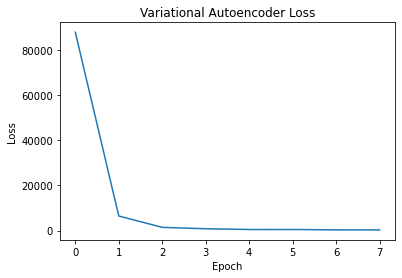

In [178]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.title('Variational Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# REGPLOT of Variational AutoEncoder

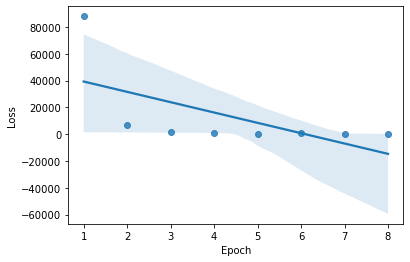

In [179]:
l=[]
import seaborn as sns
epoc = len( result.history['loss'])
for i in range(epoc):
        l.append(i+1)
        
loss1= result.history['loss'] 

df = pd.DataFrame({
    'epoch': l,
    'loss' : loss1
})

sns.regplot(x='epoch', y='loss', data=df)

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()


# Comparison of both models

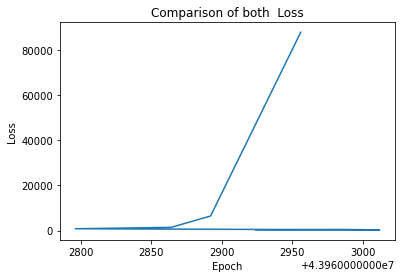

In [180]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],result.history['loss'])
plt.title('Comparison of both  Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Reverse Conversion

In [174]:
import pandas as pd

df_original = data

original_column = 'URBAN_RURA'

result = df_original[['DHSID', 'GEID', 'country code and phase', 'region',
       'source of drinking water (simplified)', 'location of source for water',
       'year of interview', 'time to get to water source (minutes)',
       'source of drinking water (weights)']]

result[original_column] = df_original.apply(lambda row: 'R' if row[f"{original_column}_R"] == 1 else 'U', axis=1)

result


C:\Users\ahmed\AppData\Local\Temp\ipykernel_17652\612931164.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[original_column] = df_original.apply(lambda row: 'R' if row[f"{original_column}_R"] == 1 else 'U', axis=1)


,DHSID,GEID,country code and phase,region,source of drinking water (simplified),location of source for water,year of interview,time to get to water source (minutes),source of drinking water (weights),URBAN_RURA
0,0,0,0,230,3,0,-0.943287,-0.516811,2.060657,U
1,0,0,0,230,3,0,-0.943287,-0.516811,2.060657,U
2,0,0,0,230,3,0,-0.943287,-0.516811,2.060657,U
3,0,0,0,230,3,0,-0.943287,-0.516811,2.060657,U
4,0,0,0,230,3,0,-0.943287,-0.516811,2.060657,U
...,...,...,...,...,...,...,...,...,...,...
970631,38713,86,60,219,7,2,0.281455,-0.516811,0.274256,R
970632,38713,86,60,219,7,2,0.281455,-0.516811,0.274256,R
970633,38713,86,60,219,14,0,0.281455,-0.271779,-0.618945,R
970634,38713,86,60,219,7,2,0.281455,-0.516811,0.274256,R


# Removing the negative Values of Time and Year

In [175]:
df=result
column_to_reverse_transform ='time to get to water source (minutes)'

scaler = StandardScaler()
scaler.mean_ = 30  
scaler.scale_ = 12.24  

reversed_column = scaler.inverse_transform(df[[column_to_reverse_transform]])

df[column_to_reverse_transform] = reversed_column

C:\Users\ahmed\AppData\Local\Temp\ipykernel_17652\3521340304.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_to_reverse_transform] = reversed_column


In [176]:
df10= result
column_to_reverse_transform ='year of interview'

scaler = StandardScaler()
scaler.mean_ = 30  
scaler.scale_ = 12.24 

reversed_column = scaler.inverse_transform(df[[column_to_reverse_transform]])

df[column_to_reverse_transform] = reversed_column

df10

C:\Users\ahmed\AppData\Local\Temp\ipykernel_17652\3013053962.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_to_reverse_transform] = reversed_column


,DHSID,GEID,country code and phase,region,source of drinking water (simplified),location of source for water,year of interview,time to get to water source (minutes),source of drinking water (weights),URBAN_RURA
0,0,0,0,230,3,0,18.454169,23.674230,2.060657,U
1,0,0,0,230,3,0,18.454169,23.674230,2.060657,U
2,0,0,0,230,3,0,18.454169,23.674230,2.060657,U
3,0,0,0,230,3,0,18.454169,23.674230,2.060657,U
4,0,0,0,230,3,0,18.454169,23.674230,2.060657,U
...,...,...,...,...,...,...,...,...,...,...
970631,38713,86,60,219,7,2,33.445008,23.674230,0.274256,R
970632,38713,86,60,219,7,2,33.445008,23.674230,0.274256,R
970633,38713,86,60,219,14,0,33.445008,26.673422,-0.618945,R
970634,38713,86,60,219,7,2,33.445008,23.674230,0.274256,R


In [ ]:
result = df10
for i in REVESE_LABELS:
    c1 = result[i]
    min_v = min(data[i])
    max_v = max(data[i])
    temp = []
    for j in c1:
        i = float(i)
        if j>max_v:
            j = max_v
        elif j<min_v:
            j = min_v
        else:
            j = int(round(j, 0))
        temp.append(lb.inverse_transform([j])[0])
    result[i] = temp
result.head()